<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import numpy as np

In [150]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
import random

In [151]:
X,y=make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [152]:
df=pd.DataFrame(X,columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target']=y


In [153]:
df.head()

,col1,col2,col3,col4,col5,target
0,1.807219,-1.953351,-1.546711,-0.281830,-0.893895,1
1,-1.503307,1.454190,1.898401,1.664879,0.358427,0
2,2.690206,1.266995,-2.173196,1.238700,1.009819,1
3,-0.595380,0.112151,1.989758,0.658037,0.097968,0
4,-2.758230,2.200276,0.273197,-0.256757,0.337011,0


In [154]:
df.shape

(100, 6)

In [155]:
# Row Sampling
def sample_row(df, percentage):
  return df.sample(int(percentage*df.shape[0]),replace=True)

In [190]:
# Col  Sampling
def sample_column(df, percentage):
  col= random.sample(df.columns.tolist()[:-1],int(percentage*(df.shape[1]-1)))
  new_df=df[col]
  new_df['target']=df['target']
  return new_df

In [157]:
def combine_row_col(df,row_percentage, col_percentage):
  new_df=sample_row(df,row_percentage)
  return sample_column(new_df,col_percentage)


In [158]:
df1=sample_row(df,0.2)
df2=sample_row(df,0.2)
df3=sample_row(df,0.2)

In [159]:
dt1=DecisionTreeClassifier()
dt1.fit(df1.iloc[:,0:5], df1.iloc[:,-1])


DecisionTreeClassifier()

In [160]:
dt2=DecisionTreeClassifier()
dt2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])


DecisionTreeClassifier()

In [161]:
dt3=DecisionTreeClassifier()
dt3.fit(df3.iloc[:,0:5], df3.iloc[:,-1])


DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.603\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.4, 0.5, 'x[2] <= 1.103\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

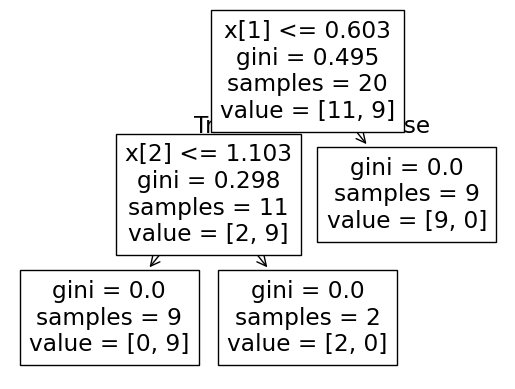

In [162]:
plot_tree(dt1)

[Text(0.6, 0.875, 'x[3] <= 0.43\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.4, 0.625, 'x[0] <= -2.339\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.375, 'x[2] <= 1.076\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.7, 0.75, '  False')]

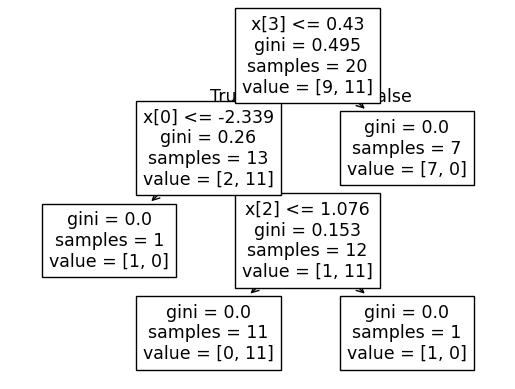

In [163]:
plot_tree(dt2)

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.042\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.468\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

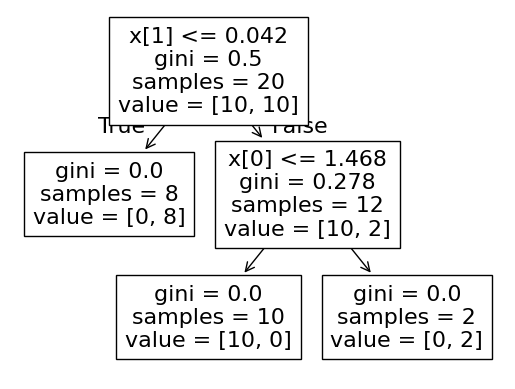

In [164]:
plot_tree(dt3)

In [165]:
dt1.predict(np.array([-1.723892,4.426105,-1.584139,2.122475,1.723984]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [166]:
dt2.predict(np.array([-1.723892,4.426105,-1.584139,2.122475,1.723984]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [167]:
dt3.predict(np.array([-1.723892,4.426105,-1.584139,2.122475,1.723984]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [200]:
dfc1=sample_column(df,0.8)
dfc2=sample_column(df,0.8)
dfc3=sample_column(df,0.8)

/tmp/ipython-input-2598980760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
/tmp/ipython-input-2598980760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
/tmp/ipython-input-2598980760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [202]:
dfc1

,col3,col1,col4,col2,target
0,-1.546711,1.807219,-0.281830,-1.953351,1
1,1.898401,-1.503307,1.664879,1.454190,0
2,-2.173196,2.690206,1.238700,1.266995,1
3,1.989758,-0.595380,0.658037,0.112151,0
4,0.273197,-2.758230,-0.256757,2.200276,0
...,...,...,...,...,...
95,0.483532,0.237399,-0.960144,-1.874879,1
96,-0.948617,0.391022,-1.126884,-0.669229,1
97,0.879467,0.669553,-1.660164,-0.248265,1
98,-2.095572,0.437314,-1.004656,-2.168549,1


[Text(0.5666666666666667, 0.9166666666666666, 'x[3] <= -0.026\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.3333333333333333, 0.75, 'x[0] <= 1.116\ngini = 0.136\nsamples = 41\nvalue = [3, 38]'),
 Text(0.44999999999999996, 0.8333333333333333, 'True  '),
 Text(0.2, 0.5833333333333334, 'x[2] <= -2.666\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[2] <= -2.936\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.06666666666666667, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.4666666666666667, 0.5833333333333334, 'x[2] <= 0.072\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.75, 'x[1] <= 1.46

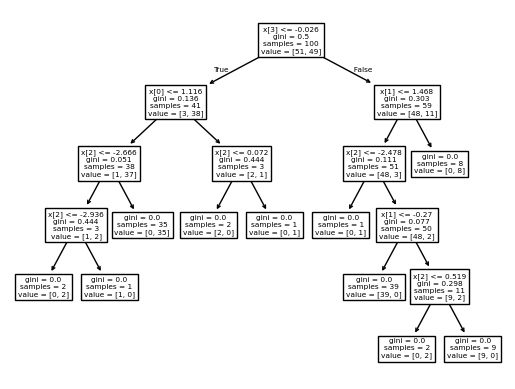

In [206]:
dtc1=DecisionTreeClassifier()
dtc1.fit(dfc1.iloc[:,0:4], dfc1.iloc[:,-1])
plot_tree(dtc1)

[Text(0.5666666666666667, 0.9166666666666666, 'x[2] <= -0.026\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.3333333333333333, 0.75, 'x[1] <= 1.116\ngini = 0.136\nsamples = 41\nvalue = [3, 38]'),
 Text(0.44999999999999996, 0.8333333333333333, 'True  '),
 Text(0.2, 0.5833333333333334, 'x[3] <= -2.666\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[1] <= -1.061\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.06666666666666667, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.4666666666666667, 0.5833333333333334, 'x[2] <= -1.275\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.75, 'x[0] <= 1.4

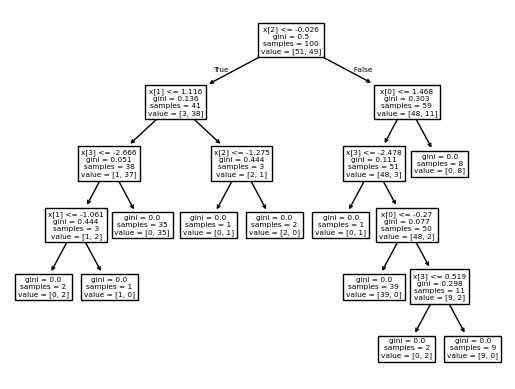

In [207]:
dtc2=DecisionTreeClassifier()
dtc2.fit(dfc2.iloc[:,0:4], dfc2.iloc[:,-1])
plot_tree(dtc2)

[Text(0.5666666666666667, 0.9166666666666666, 'x[3] <= -0.026\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.3333333333333333, 0.75, 'x[1] <= 1.116\ngini = 0.136\nsamples = 41\nvalue = [3, 38]'),
 Text(0.44999999999999996, 0.8333333333333333, 'True  '),
 Text(0.2, 0.5833333333333334, 'x[0] <= -2.666\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[1] <= -1.061\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.06666666666666667, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.4666666666666667, 0.5833333333333334, 'x[1] <= 1.611\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.75, 'x[2] <= 1.46

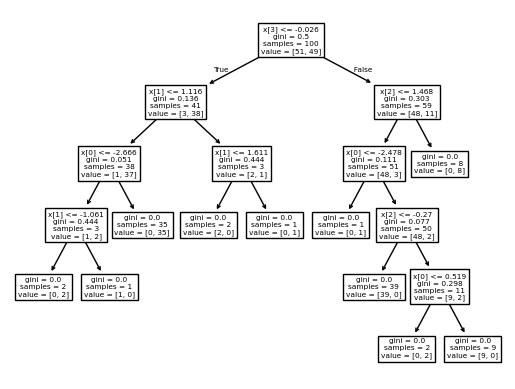

In [208]:
dtc3=DecisionTreeClassifier()
dtc3.fit(dfc3.iloc[:,0:4], dfc3.iloc[:,-1])
plot_tree(dtc3)

In [214]:
dtc3.predict(np.array([-0.281830,-1.546711,1.807219,-1.953351]).reshape(1,4))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [215]:
dtc1.predict(np.array([-0.281830,-1.546711,1.807219,-1.953351]).reshape(1,4))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [216]:
dtc2.predict(np.array([-0.281830,-1.546711,1.807219,-1.953351]).reshape(1,4))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [213]:
dfc3

,col4,col3,col1,col2,target
0,-0.281830,-1.546711,1.807219,-1.953351,1
1,1.664879,1.898401,-1.503307,1.454190,0
2,1.238700,-2.173196,2.690206,1.266995,1
3,0.658037,1.989758,-0.595380,0.112151,0
4,-0.256757,0.273197,-2.758230,2.200276,0
...,...,...,...,...,...
95,-0.960144,0.483532,0.237399,-1.874879,1
96,-1.126884,-0.948617,0.391022,-0.669229,1
97,-1.660164,0.879467,0.669553,-0.248265,1
98,-1.004656,-2.095572,0.437314,-2.168549,1


In [221]:
d1=combine_row_col(df,0.5,0.5)
d2=combine_row_col(df,0.5,0.5)
d3=combine_row_col(df,0.5,0.5)

/tmp/ipython-input-2598980760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
/tmp/ipython-input-2598980760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
/tmp/ipython-input-2598980760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [222]:
d1

,col2,col3,target
75,2.090544,1.528099,0
7,1.682492,1.396661,0
96,-0.669229,-0.948617,1
96,-0.669229,-0.948617,1
53,-1.396494,-2.364676,1
28,1.564734,0.184510,0
16,-2.123499,-1.235766,1
86,-1.030497,-0.465774,1
68,-2.142840,-3.421151,1
2,1.266995,-2.173196,1


[Text(0.5555555555555556, 0.9, 'x[0] <= 0.363\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= 1.228\ngini = 0.245\nsamples = 28\nvalue = [4, 24]'),
 Text(0.4444444444444444, 0.8, 'True  '),
 Text(0.2222222222222222, 0.5, 'x[0] <= -1.255\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.3333333333333333, 0.3, 'x[0] <= -1.072\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.7, 'x[0] <= 1.374\ngini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.6666666666666667, 0.8, '  False'),
 Text(0.6666666666666666, 0.5, 'x[1] <= 1.131\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsam

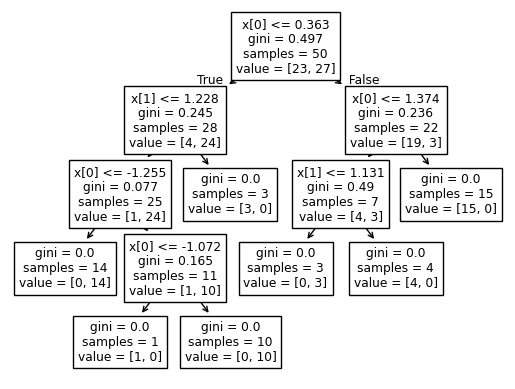

In [223]:
dc1=DecisionTreeClassifier()
dc1.fit(d1.iloc[:,0:2], d1.iloc[:,-1])
plot_tree(dc1)

[Text(0.4444444444444444, 0.9, 'x[0] <= -0.665\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.2222222222222222, 0.7, 'x[1] <= 1.91\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= -1.187\ngini = 0.251\nsamples = 34\nvalue = [29, 5]'),
 Text(0.5555555555555556, 0.8, '  False'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7777777777777778, 0.5, 'x[1] <= -0.068\ngini = 0.121\nsamples = 31\nvalue = [29, 2]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 1.066\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [26

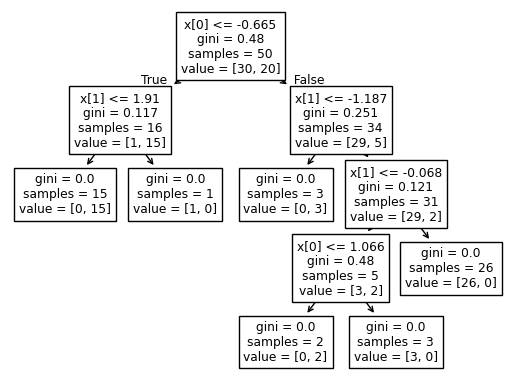

In [224]:
dc2=DecisionTreeClassifier()
dc2.fit(d2.iloc[:,0:2], d2.iloc[:,-1])
plot_tree(dc2)

[Text(0.5, 0.9285714285714286, 'x[0] <= -0.033\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.16666666666666666, 0.7857142857142857, 'x[0] <= -0.813\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.3333333333333333, 0.8571428571428572, 'True  '),
 Text(0.08333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.25, 0.6428571428571429, 'x[0] <= -0.786\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 1.043\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.25, 0.35714285714285715, 'x[1] <= 0.569\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4166666666666667, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8333333333

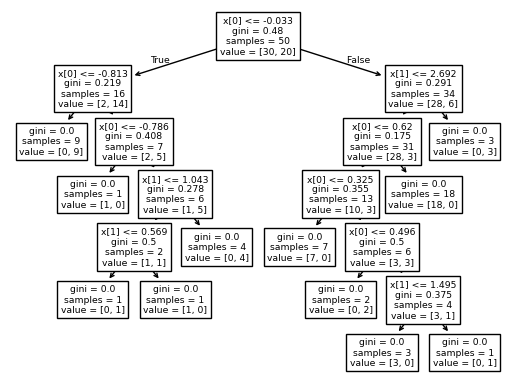

In [225]:
dc3=DecisionTreeClassifier()
dc3.fit(d3.iloc[:,0:2], d3.iloc[:,-1])
plot_tree(dc3)

In [226]:
dc1.predict(np.array([-1.497475,0.569143]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [227]:
dc2.predict(np.array([-1.497475,0.569143]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [228]:
dc3.predict(np.array([-1.497475,0.569143]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])